# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
#import openweathermapy as ow
url = "https://openweathermap.org/api"
print(requests.get(url))
#from pprint import pprint
import scipy.stats as st
from scipy.stats import linregress

#Import API key
from api_keys import weather_api_key

#Import citipy to determine city based on latitude and longitude
from citipy import citipy

# Output Folder (csv file)
output_data = "output_data/cities.csv"

# Range of latitudes and longtudes
latitudes_range = (-90, 90)
longtudes_range = (-180, 180)

<Response [200]>


## Generate Cities List

In [2]:
#list for holding latitudes_longitudes and cities
latitudes_longtudes = []
cities = []

#Set of random latitudes and longitudes combinations
latitudes = np.random.uniform(low=-90.000, high=90.000, size=1500)
longitudes = np.random.uniform(low=-180.000, high=180.000, size=1500)
latitudes_longtudes = zip(latitudes, longitudes)

# Nearest city for each latitude,longitude combination
for latitudes_longtude in latitudes_longtudes:
    city = citipy.nearest_city(latitudes_longtude[0], latitudes_longtude[1]).city_name
    
    #if the city is unique, then add it to a  our cities list
    if city not in cities:
        cities.append(city)
        
#Sufficent count
len(cities)

625

In [3]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
latitude_list = []
longitude_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
print("Data Retrieval ")
print("---------------")

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        latitude_list.append(response["coord"]["lat"])
        longitude_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("------------------")
print("Retrieval Complete")
print("------------------")

Data Retrieval 
---------------
Processing Record 1 of Set 1 : puerto ayora
Processing Record 2 of Set 1 : asfi
Processing Record 3 of Set 1 : port alfred
Processing Record 4 of Set 1 : ruwi
Processing Record 5 of Set 1 : penzance
Processing Record 6 of Set 1 : mar del plata
Processing Record 7 of Set 1 : meulaboh
Processing Record 8 of Set 1 : bandarbeyla
Processing Record 9 of Set 1 : bluff
Processing Record 10 of Set 1 : punta arenas
Processing Record 11 of Set 1 : sitka
Processing Record 12 of Set 1 : hambantota
City not found. Skipping...
Processing Record 13 of Set 1 : port blair
Processing Record 14 of Set 1 : kodiak
Processing Record 15 of Set 1 : ushuaia
Processing Record 16 of Set 1 : bethel
Processing Record 17 of Set 1 : impfondo
City not found. Skipping...
Processing Record 18 of Set 1 : hobart
Processing Record 19 of Set 1 : bambous virieux
Processing Record 20 of Set 1 : ancud
Processing Record 21 of Set 1 : mataura
Processing Record 22 of Set 1 : tiznit
Processing Recor

Processing Record 32 of Set 4 : flinders
Processing Record 33 of Set 4 : bodmin
Processing Record 34 of Set 4 : comodoro rivadavia
Processing Record 35 of Set 4 : porto walter
Processing Record 36 of Set 4 : hilo
Processing Record 37 of Set 4 : portland
Processing Record 38 of Set 4 : vila do maio
Processing Record 39 of Set 4 : nikki
City not found. Skipping...
City not found. Skipping...
Processing Record 40 of Set 4 : bud
Processing Record 41 of Set 4 : bucak
City not found. Skipping...
Processing Record 42 of Set 4 : abu samrah
Processing Record 43 of Set 4 : ereymentau
Processing Record 44 of Set 4 : prien
Processing Record 45 of Set 4 : klaksvik
Processing Record 46 of Set 4 : torbay
Processing Record 47 of Set 4 : halifax
Processing Record 48 of Set 4 : sal rei
Processing Record 49 of Set 4 : ampanihy
Processing Record 50 of Set 4 : maues
Processing Record 0 of Set 5 : skjervoy
Processing Record 1 of Set 5 : beyneu
Processing Record 2 of Set 5 : deputatskiy
Processing Record 3 o

Processing Record 20 of Set 8 : pedro ii
Processing Record 21 of Set 8 : mizdah
Processing Record 22 of Set 8 : pastavy
Processing Record 23 of Set 8 : tortoli
Processing Record 24 of Set 8 : molina
Processing Record 25 of Set 8 : houma
City not found. Skipping...
Processing Record 26 of Set 8 : panorama
Processing Record 27 of Set 8 : kazerun
Processing Record 28 of Set 8 : kilindoni
Processing Record 29 of Set 8 : tulum
Processing Record 30 of Set 8 : kirakira
Processing Record 31 of Set 8 : constitucion
Processing Record 32 of Set 8 : toktogul
Processing Record 33 of Set 8 : neryungri
Processing Record 34 of Set 8 : tezu
Processing Record 35 of Set 8 : tarko-sale
Processing Record 36 of Set 8 : luanda
Processing Record 37 of Set 8 : sao joao da barra
Processing Record 38 of Set 8 : mazyr
Processing Record 39 of Set 8 : noumea
Processing Record 40 of Set 8 : kokstad
Processing Record 41 of Set 8 : vestmannaeyjar
Processing Record 42 of Set 8 : tofield
Processing Record 43 of Set 8 : 

Processing Record 4 of Set 12 : nago
Processing Record 5 of Set 12 : betanzos
Processing Record 6 of Set 12 : nikolayevka
City not found. Skipping...
City not found. Skipping...
Processing Record 7 of Set 12 : mombasa
Processing Record 8 of Set 12 : ajaccio
Processing Record 9 of Set 12 : bambanglipuro
Processing Record 10 of Set 12 : poronaysk
Processing Record 11 of Set 12 : acari
Processing Record 12 of Set 12 : kargasok
Processing Record 13 of Set 12 : babadag
------------------
Retrieval Complete
------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Panda Data
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : latitude_list,
                "Lng" : longitude_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

In [6]:
#Count data
weather_dict.count()

City          574
Cloudiness    574
Country       574
Date          574
Humidity      574
Lat           574
Lng           574
Max Temp      574
Wind Speed    574
dtype: int64

In [60]:
weather_dict.loc[weather_dict["Humidity"] >= 100]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
23,Norman Wells,20,CA,1601888480,100,65.28,-126.83,30.20,4.70
35,Lompoc,90,US,1601888686,100,34.64,-120.46,55.40,3.38
40,Laas,75,IT,1601888745,100,46.62,10.70,51.01,3.36
47,Grindavik,75,IS,1601888753,100,63.84,-22.43,37.40,4.70
63,Salinas,90,US,1601888469,100,36.68,-121.66,57.20,3.36
108,Mar del Plata,90,AR,1601888797,100,-38.00,-57.56,50.00,17.22
110,Jamestown,90,US,1601888631,100,42.10,-79.24,50.00,5.82
112,Zapolyarnyy,75,RU,1601888800,100,69.42,30.81,39.20,9.17
142,Cayenne,15,GF,1601888823,100,4.93,-52.33,75.20,2.24
149,Clyde River,75,CA,1601888829,100,70.47,-68.59,26.60,2.24


In [7]:
#Creating a csv file
weather_dict.to_csv("../output_data/cities.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

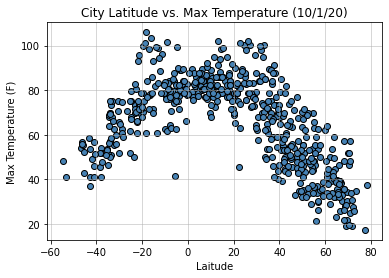

In [8]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (10/1/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

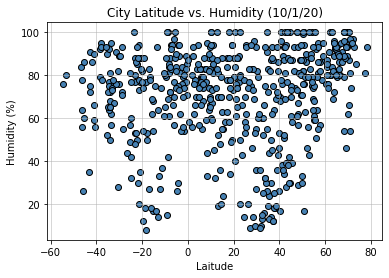

In [9]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (10/1/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

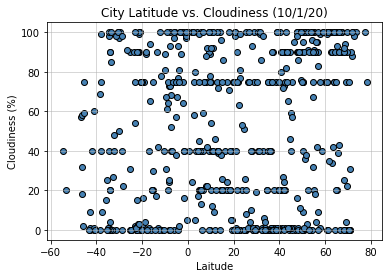

In [10]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (10/1/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

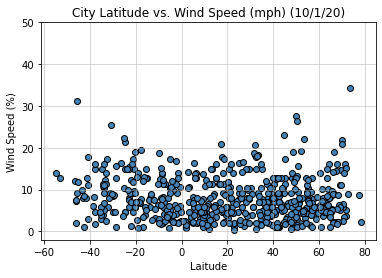

In [11]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (10/1/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [12]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]

In [13]:
# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.83


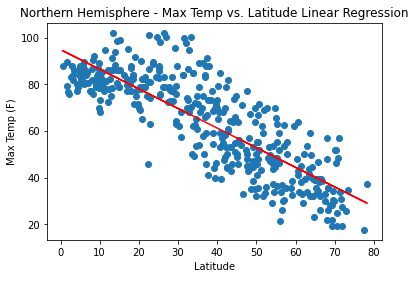

In [14]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.69


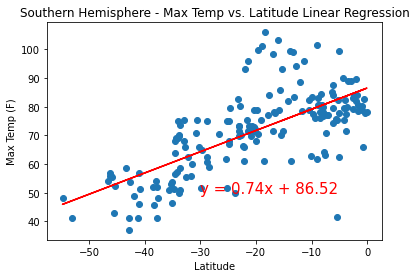

In [15]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.2


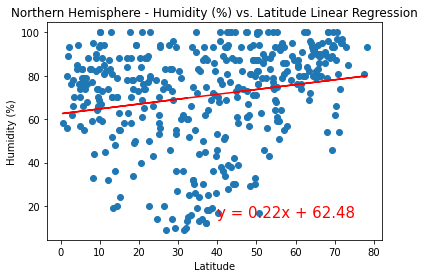

In [16]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.01


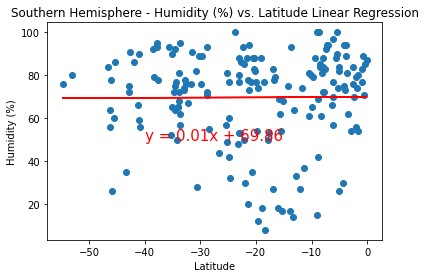

In [17]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.14


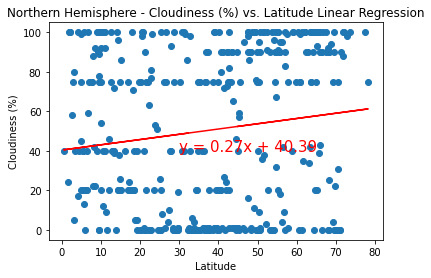

In [18]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.28


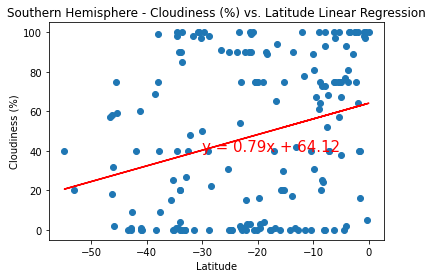

In [19]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.11


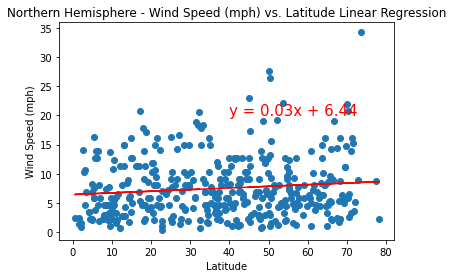

In [20]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.19


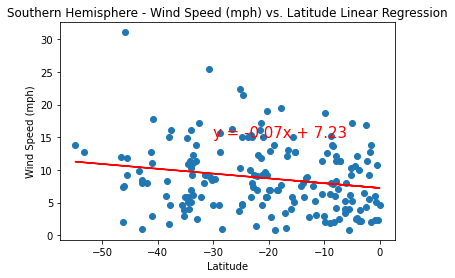

In [21]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

In [ ]:
Observation:

#Strong air pressure gradient has an affect on wind speed rather than Latitude here. As there would be greater air pressure gradient, there would be more wind speed.

#Northern Hempisphere climate is just bit more in latitude when compared to the Southern Hemisphere. A reason could be from obervation that Northern Hemisphere having more land than Southern Hemisphere.

#When the temperature drops with the increase or decrease latitude, at zero latitude the temperautre is set to be highest. The simple explanation is that the sunlight reaches equator quicker than other region of earth due to its round shape.  
